In [124]:
import numpy as np
import matplotlib.pyplot as plt 
import utils
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [131]:
# No header on data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# setting column names
df = pd.read_csv('housing.csv', names=column_names,header=None,delimiter='\s+')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [132]:
df.shape


(506, 14)

In [133]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# check for missing values in the columns
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

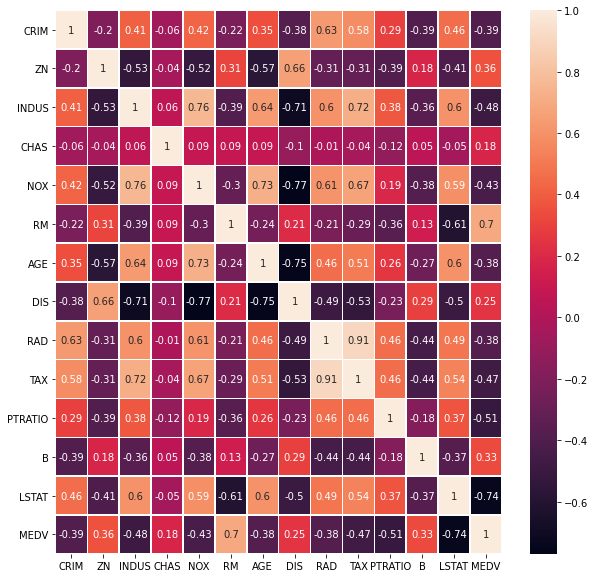

In [134]:
# checking pair wise correlation for all columns  
fig, ax = plt.subplots(figsize=(10,10))  
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,linewidths=.5, ax=ax)
# Observaation: By correlation matrix RM and LSTAT have high correlation with MEDV 

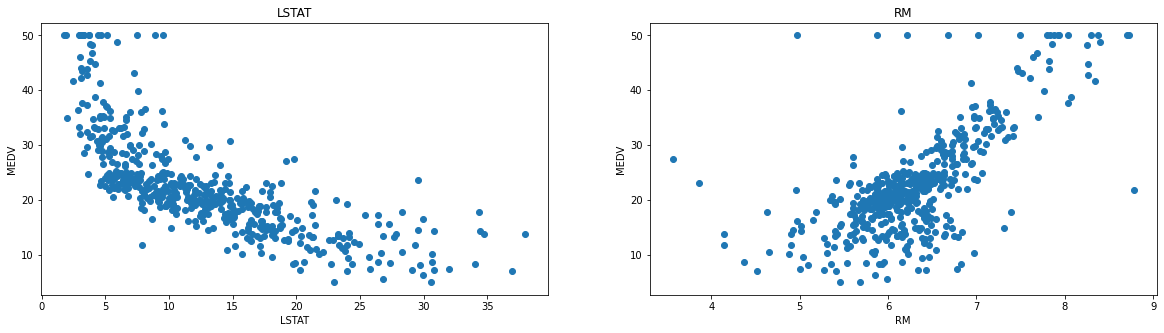

In [66]:
# plotting features vs target
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
# by observation RM is more closely related to MSDV

In [67]:
# prepare data for training 
n = len(df)
n_test = int(0.2 * n)
n_train = n - n_test
       
df_train = df.iloc[:n_train].copy()
df_test = df.iloc[n_train:].copy()
       
Y_train = df_train.MEDV.values
Y_test = df_test.MEDV.values
del df_train['MEDV']
del df_test['MEDV']



In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(405, 13)
(101, 13)
(405,)
(101,)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Model: 1 

The model performance for training set:
RMSE is 6.151347885738324
R2 score is 0.5597465670779795 

The model performance for testing set:
RMSE is 8.593344540429772
R2 score is -1.777369130133816


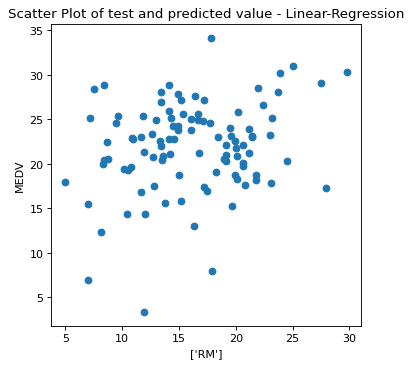

Model: 2 

The model performance for training set:
RMSE is 6.518618343964635
R2 score is 0.5056058969070407 

The model performance for testing set:
RMSE is 4.818480101222461
R2 score is 0.1267686994684042


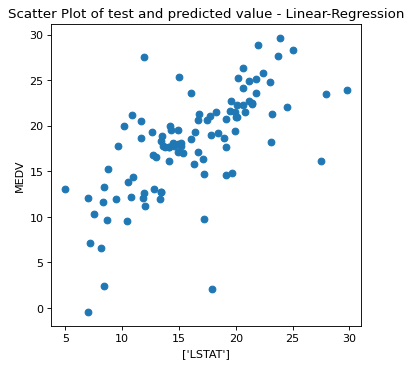

Model: 3 

The model performance for training set:
RMSE is 5.492331306874983
R2 score is 0.6490254493845824 

The model performance for testing set:
RMSE is 6.0506139436788136
R2 score is -0.37691788943237503


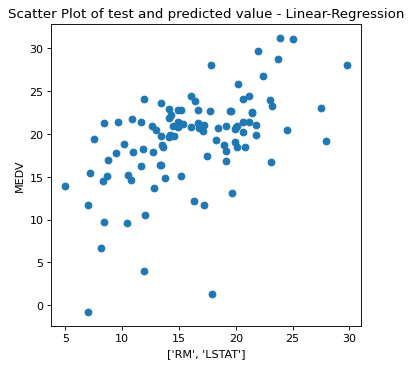

Model: 4 

The model performance for training set:
RMSE is 5.289339995400907
R2 score is 0.6744893957039968 

The model performance for testing set:
RMSE is 5.212449359859007
R2 score is -0.021863418474038276


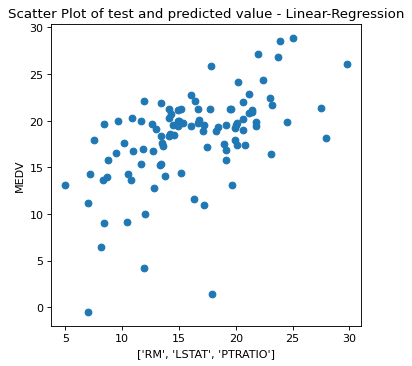

Model: 5 

The model performance for training set:
RMSE is 4.76835289628281
R2 score is 0.7354553691891204 

The model performance for testing set:
RMSE is 5.7717940507348064
R2 score is -0.25294153725445834


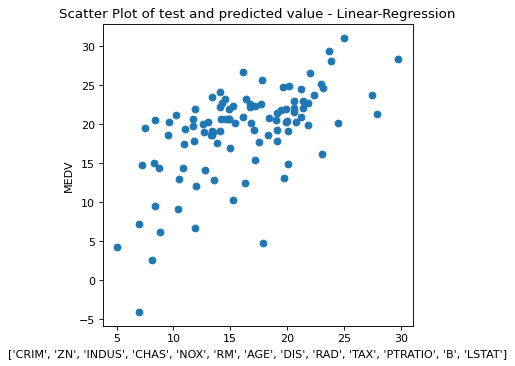

In [117]:
# seleting features
# taken five models

models=[['RM'],['LSTAT'],['RM','LSTAT'],['RM','LSTAT','PTRATIO'],['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
i=1
for features in models:
    X_train=df_train[features].copy()
    X_test=df_test[features].copy()
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)
    Y_train_pred = lin_reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    r2 = r2_score(Y_train, Y_train_pred)
    print('Model: {}'.format(i),"\n")

    print("The model performance for training set:")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2),"\n")

    # model evaluation for testing set

    Y_test_pred = lin_reg.predict(X_test)
    # root mean square error of the model
    rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

    # r-squared score of the model
    r2 = r2_score(Y_test, Y_test_pred)

    print("The model performance for testing set:")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
 
    #plot 
    plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(Y_test, Y_test_pred)
    plt.title("Scatter Plot of test and predicted value - Linear-Regression")
    plt.xlabel(features)
    plt.ylabel("MEDV")
    plt.show()
    plt.show()
    i=i+1